In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pydotplus
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image


In [3]:
from google.colab import drive
url = '/content/drive/MyDrive/Colab Notebooks/Datasetmold_New800.csv'
df = pd.read_csv(url)
df

,Status,Grade,Customer,Part_aplication,Qty-Product,Injection(Ton),Resin_plastic,Texture-Product,Cavity.Material,Core.Material,Slide-System,Lift-Core-System,Mold-Design.Type,HOT-RUNNER,Mold/Base_Order-Company,Weight(KG),Price-Rp
0,Mahal,3,BANSHU,MotorCycle,1,450,PP(GF20%),NO,HP4M,HP4M,YES,YES,2P SIDE GATE,NOTYET,BUMHAN(KOREA),1986,406000000
1,Mahal,3,BANSHU,MotorCycle,1,450,PP(GF20%),NO,HP4M,HP4M,YES,YES,2P SIDE GATE,NOTYET,BUMHAN(KOREA),1986,406000000
2,Mahal,4,KAON,Wireless,1,170,PC,NO,STAVAX,NAK80,YES,YES,3P PIN GATE,NOTYET,SEHYUN,590,334600000
3,Mahal,4,KAON,Wireless,1,170,ABS (V0),YES,SKD61,SKD61,NO,YES,3P PIN GATE,NOTYET,SEHYUN,484,341600000
4,Murah,3,KAON,Wireless,2,100,XG 569C,NO,STAVAX,NAK80,YES,NO,3P PIN GATE,NOTYET,SEHYUN,196,112000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Mahal,4,KITADA,Car,1,450,PC-ABS,NO,HP4M,HP4M,YES,YES,2P H.R VALVE 1 ZONE,YUDO-INDONESIA,JXMould(CHINA),1960,610554000
797,Mahal,3,KITADA,Car,2,220,PP,NO,HP4M,HP4M,YES,NO,2P SIDE GATE,NOTYET,GAYA,675,287770000
798,Murah,3,KITADA,Car,2,150,POM,NO,HP4M,HP4M,NO,NO,2P SIDE GATE,NOTYET,GAYA,273,206108000
799,Mahal,3,KITADA,Car,2,80,PA6,NO,2738,2738,YES,NO,2P SIDE GATE,NOTYET,GAYA,155,177912000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Status                   801 non-null    object
 1   Grade                    801 non-null    int64 
 2   Customer                 801 non-null    object
 3   Part_aplication          801 non-null    object
 4   Qty-Product              801 non-null    int64 
 5   Injection(Ton)           801 non-null    int64 
 6   Resin_plastic            801 non-null    object
 7   Texture-Product          801 non-null    object
 8   Cavity.Material          801 non-null    object
 9   Core.Material            801 non-null    object
 10  Slide-System             801 non-null    object
 11  Lift-Core-System         801 non-null    object
 12  Mold-Design.Type         801 non-null    object
 13  HOT-RUNNER               801 non-null    object
 14  Mold/Base_Order-Company  801 non-null    o

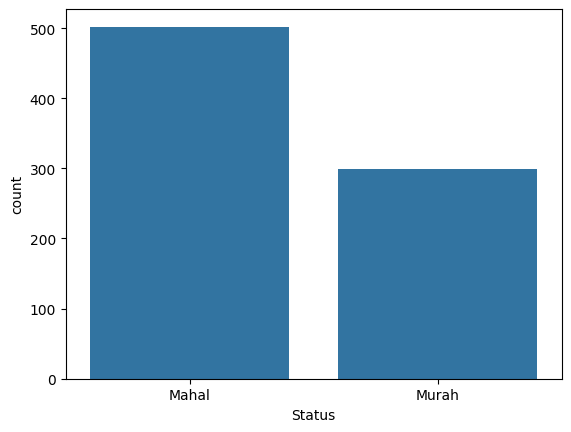

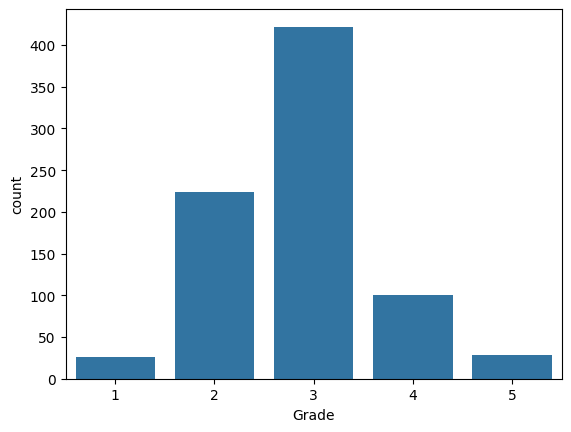

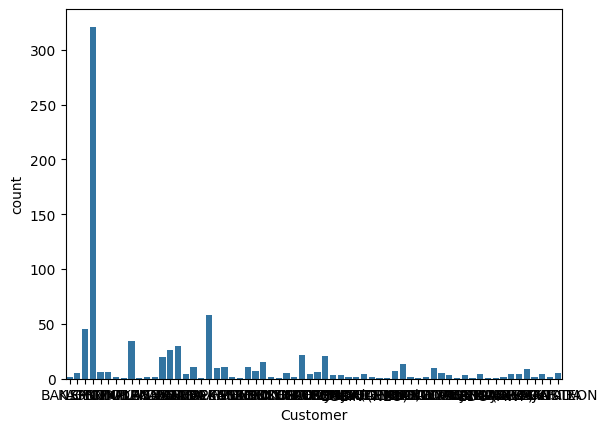

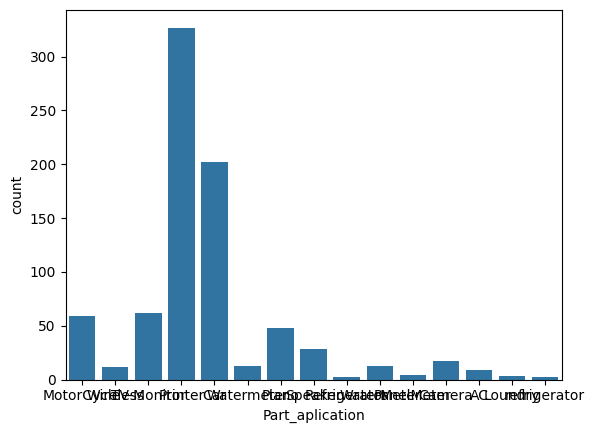

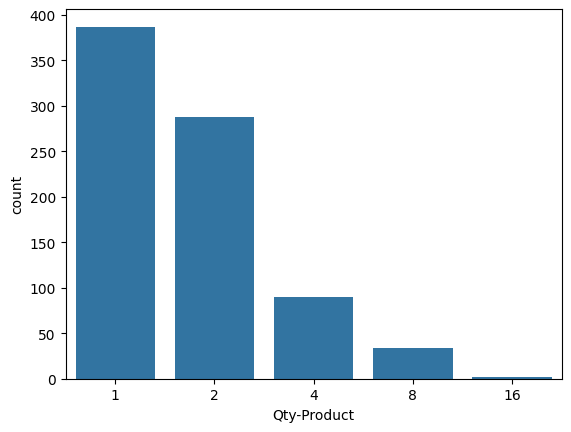

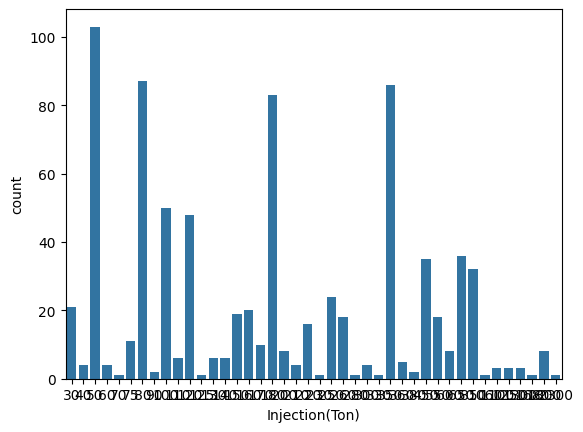

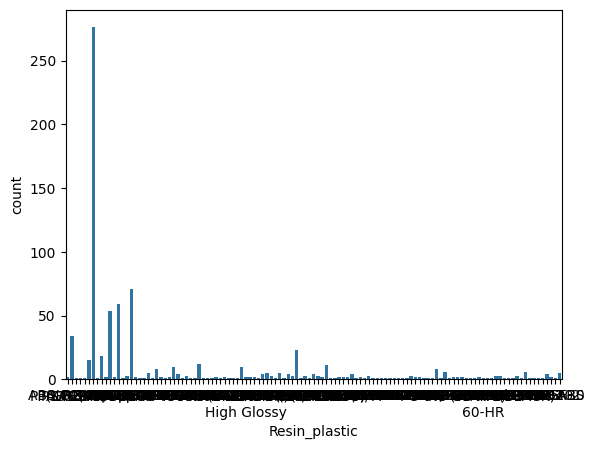

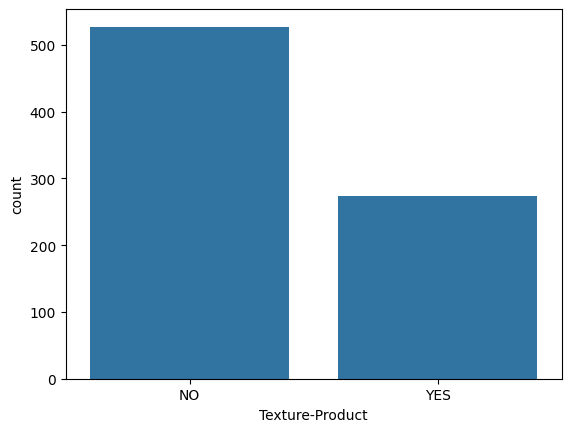

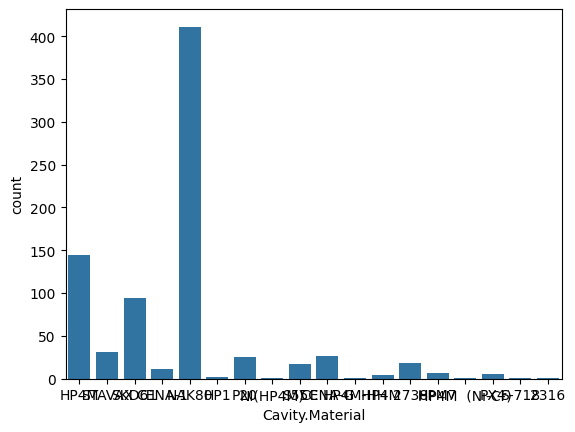

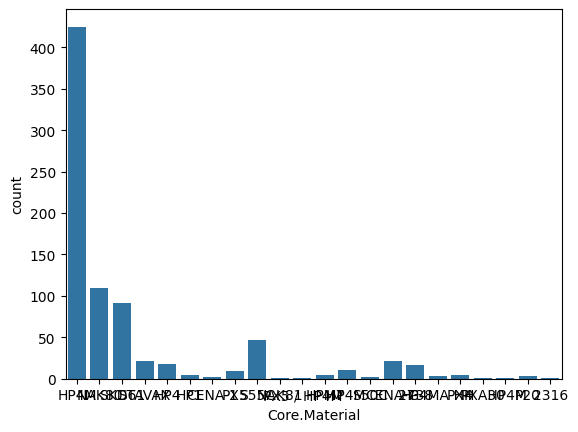

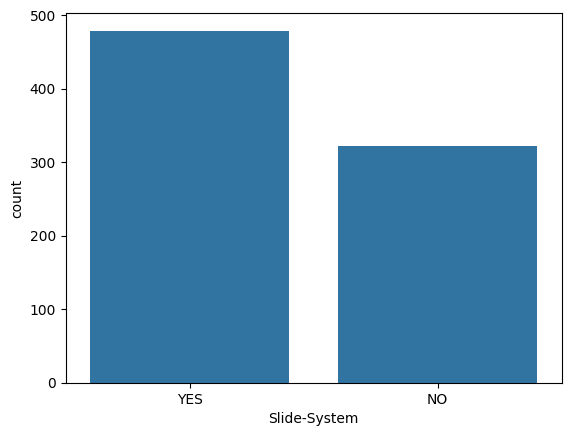

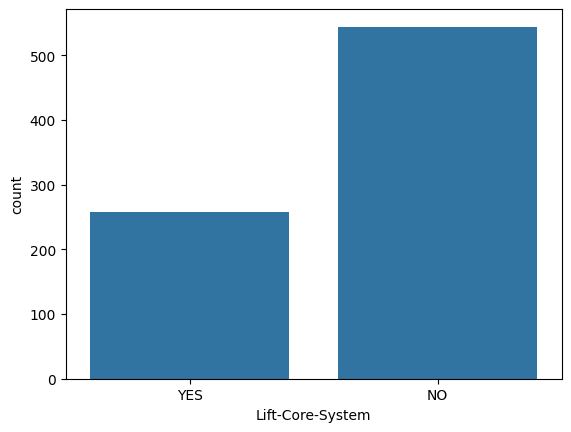

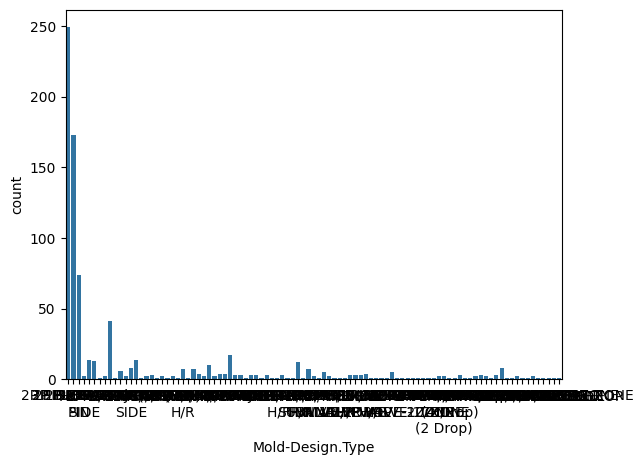

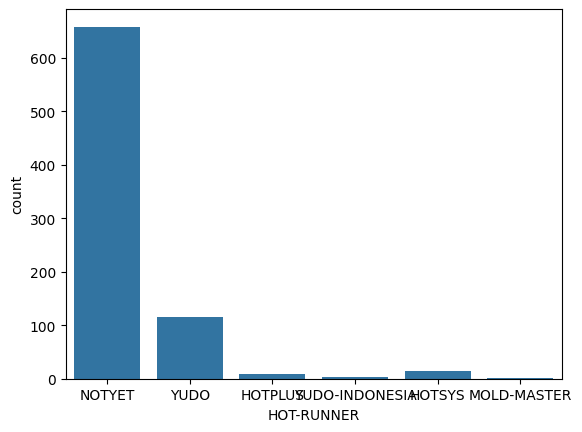

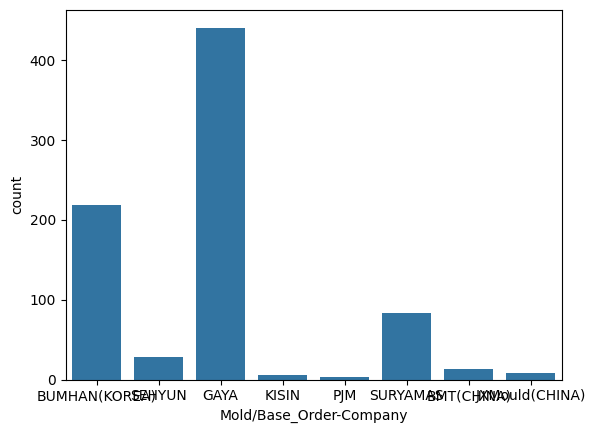

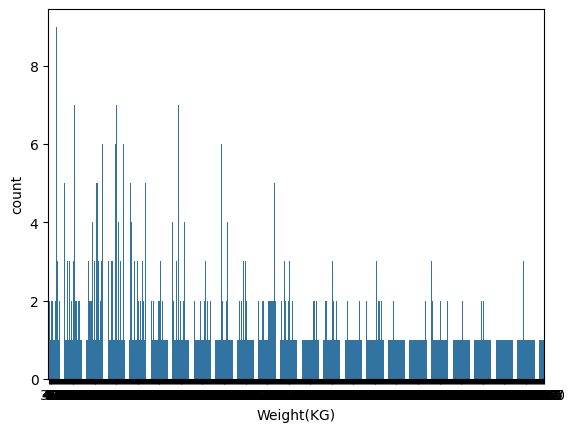

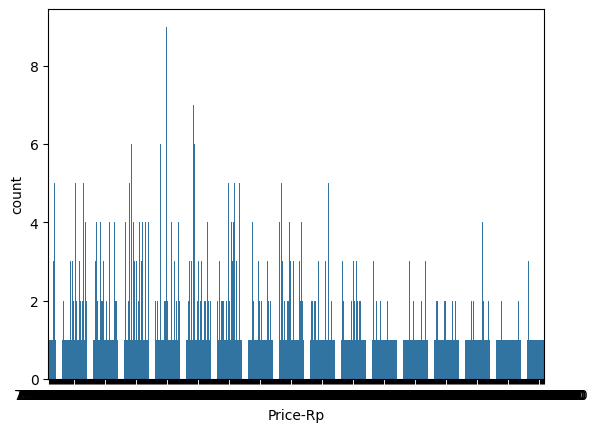

In [5]:
for i in df.columns:
    sns.countplot(data=df,x=i)
    plt.show()

In [6]:
x=df.drop("Status",axis=1)
y=df["Status"]
x.head()

,Grade,Customer,Part_aplication,Qty-Product,Injection(Ton),Resin_plastic,Texture-Product,Cavity.Material,Core.Material,Slide-System,Lift-Core-System,Mold-Design.Type,HOT-RUNNER,Mold/Base_Order-Company,Weight(KG),Price-Rp
0,3,BANSHU,MotorCycle,1,450,PP(GF20%),NO,HP4M,HP4M,YES,YES,2P SIDE GATE,NOTYET,BUMHAN(KOREA),1986,406000000
1,3,BANSHU,MotorCycle,1,450,PP(GF20%),NO,HP4M,HP4M,YES,YES,2P SIDE GATE,NOTYET,BUMHAN(KOREA),1986,406000000
2,4,KAON,Wireless,1,170,PC,NO,STAVAX,NAK80,YES,YES,3P PIN GATE,NOTYET,SEHYUN,590,334600000
3,4,KAON,Wireless,1,170,ABS (V0),YES,SKD61,SKD61,NO,YES,3P PIN GATE,NOTYET,SEHYUN,484,341600000
4,3,KAON,Wireless,2,100,XG 569C,NO,STAVAX,NAK80,YES,NO,3P PIN GATE,NOTYET,SEHYUN,196,112000000


In [7]:
Encoder_X = LabelEncoder()
for col in x.columns:
    x[col] = Encoder_X.fit_transform(x[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [8]:
x

,Grade,Customer,Part_aplication,Qty-Product,Injection(Ton),Resin_plastic,Texture-Product,Cavity.Material,Core.Material,Slide-System,Lift-Core-System,Mold-Design.Type,HOT-RUNNER,Mold/Base_Order-Company,Weight(KG),Price-Rp
0,2,6,4,0,30,84,0,5,7,1,1,54,3,1,402,295
1,2,6,4,0,30,84,0,5,7,1,1,54,3,1,402,295
2,3,27,13,0,16,50,0,17,11,1,1,73,3,6,232,237
3,3,27,13,0,16,3,1,16,20,0,1,73,3,6,193,244
4,2,27,13,1,8,114,0,17,11,1,0,73,3,6,75,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,3,28,2,0,30,64,0,5,7,1,1,21,5,3,400,367
797,2,28,2,1,20,74,0,5,7,1,0,54,3,2,256,199
798,2,28,2,1,14,71,0,5,7,0,0,54,3,2,112,124
799,2,28,2,1,6,40,0,1,2,1,0,54,3,2,53,96


In [9]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
X_train

,Grade,Customer,Part_aplication,Qty-Product,Injection(Ton),Resin_plastic,Texture-Product,Cavity.Material,Core.Material,Slide-System,Lift-Core-System,Mold-Design.Type,HOT-RUNNER,Mold/Base_Order-Company,Weight(KG),Price-Rp
616,1,31,10,1,31,54,1,5,7,1,1,54,3,2,332,219
329,1,4,2,1,22,21,1,5,7,1,1,28,4,7,282,225
342,0,32,10,3,8,52,0,3,4,1,0,55,3,2,62,48
394,3,22,2,2,33,49,0,1,2,1,0,22,4,1,470,463
79,2,45,2,0,9,74,0,10,11,1,0,73,3,2,125,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2,14,7,1,17,0,0,10,11,0,0,73,3,1,251,236
106,2,14,7,0,30,0,0,10,7,1,0,73,3,1,287,271
270,2,14,7,1,6,71,0,16,20,1,0,54,3,2,87,138
435,3,14,7,1,33,0,0,10,7,0,0,73,3,1,432,424


In [12]:
y_train

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,

# **Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [14]:
y_pred = rf.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0])

<Axes: >

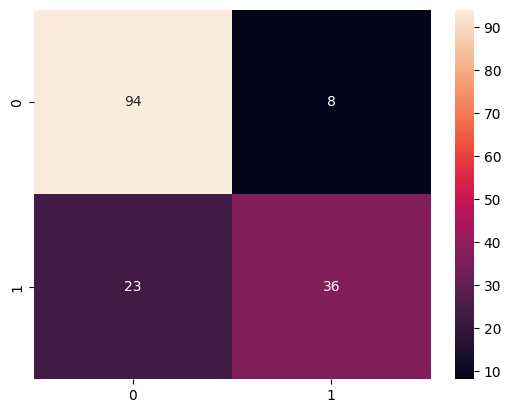

In [15]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[94  8]
 [23 36]]


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       102
           1       0.82      0.61      0.70        59

    accuracy                           0.81       161
   macro avg       0.81      0.77      0.78       161
weighted avg       0.81      0.81      0.80       161



In [18]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.19254658385093168


In [21]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    # Handling division by zero
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE:", mape)


MAPE: 13.91666666666667


In [22]:
# Tampilkan proses pohon dari model Random Forest
# Ekstraksi salah satu pohon dari hutan
estimator = rf.estimators_[0]

# Ekspor pohon ke format DOT
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=x.columns,
                class_names=Encoder_y.classes_)

# Konversi DOT menjadi gambar
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
image = Image(graph.create_png())

# Tampilkan gambar
display(image)

Output hidden; open in https://colab.research.google.com to view.